Below based on `preprocess.ipynb` by Mohsen Bagherimehrab, at Zapata repository

In [1]:
import pandas as pd
import ehm_dmrg.ehm_utils as ehm_utils
import numpy as np
import time
import matplotlib.pyplot as plt

/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
#Preprocessing
rawdata = pd.read_csv('combined_df.csv', index_col=None)
[column for column in rawdata.columns]

['hamiltonian_id',
 'num_orbitals',
 'num_electrons',
 'num_spin_orbitals',
 'two_S',
 'orbsym',
 'isym',
 'total_num_states',
 'log10_hilbert_space_size',
 'tbt_matrices_calc_time_s',
 'bandwidth_calc_time_s',
 'coulomb_matrix_bandwidth_upper',
 'coulomb_matrix_bandwidth_lower',
 'exchange_matrix_bandwidth_upper',
 'exchange_matrix_bandwidth_lower',
 'mean_field_matrix_bandwidth_upper',
 'mean_field_matrix_bandwidth_lower',
 'coulomb_calc_time_s',
 'coulomb_matrix_algebraic_connectivity',
 'coulomb_matrix_transitivity',
 'coulomb_matrix_edgeCount',
 'coulomb_matrix_graph_creation_time',
 'coulomb_matrix_algebraic_connectivity_calc_time_s',
 'coulomb_matrix_transitivity_calc_time_s',
 'coulomb_matrix_specA_min',
 'coulomb_matrix_specA_Q2',
 'coulomb_matrix_specA_max',
 'coulomb_matrix_specA_mean',
 'coulomb_matrix_specA_std',
 'coulomb_matrix_specA_coeff_variation',
 'coulomb_matrix_specA_power_spectral_entropy',
 'coulomb_matrix_specA_calc_time_s',
 'coulomb_matrix_specA_stat_calc_tim

In [3]:
# Before applying the preprocessing, we now reduced the raw dataset for one solver.
rawdata_coarse_bd = rawdata.drop(['total_loops_cpu_time_sec'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['total_loops_wall_time_sec'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['hamiltonian_id'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['orbsym'], axis=1)
rawdata_coarse_bd

,num_orbitals,num_electrons,num_spin_orbitals,two_S,isym,total_num_states,log10_hilbert_space_size,tbt_matrices_calc_time_s,bandwidth_calc_time_s,coulomb_matrix_bandwidth_upper,...,density_hopping_tensor_sum_abs,tbt_density_hopping_calc_time_s,tbt_mean,tbt_std,tbt_max,tbt_min,tbt_coeff_variation,tbt_inv_coeff_variation,tbt_calc_time_s,coarse_bond_dimension
0,33,46,66,0,1,4.066117e+16,16.609180,0.000129,0.000069,32,...,427.329292,0.000234,-0.000181,0.008872,0.267286,-0.419490,-48.890471,-0.020454,0.004729,19
1,46,57,92,1,1,2.970221e+25,25.472789,0.000156,0.000029,45,...,675.364689,0.012556,-0.000110,0.006374,0.199710,-0.327631,-57.896224,-0.017272,0.625121,13
2,46,58,92,0,1,1.792375e+25,25.253429,0.000148,0.000029,45,...,643.901094,0.016808,-0.000105,0.006246,0.196475,-0.318972,-59.572611,-0.016786,0.452869,8
3,33,45,66,1,1,8.906733e+16,16.949718,0.000099,0.000029,32,...,445.456564,0.000227,-0.000208,0.009116,0.267021,-0.459342,-43.897176,-0.022781,0.004100,170
4,32,50,64,0,1,4.785570e+13,13.679934,0.000068,0.000026,31,...,400.407716,0.000229,-0.000267,0.010970,0.185329,-0.572850,-41.013888,-0.024382,0.003799,9
5,51,74,102,0,1,9.533095e+24,24.979234,0.000170,0.000031,50,...,861.175857,0.016061,-0.000084,0.005300,0.280269,-0.456726,-63.056685,-0.015859,0.525287,77
6,27,44,54,0,1,2.393071e+10,10.378956,0.000081,0.000032,26,...,325.756966,0.000171,-0.000382,0.013949,0.151781,-0.593228,-36.478773,-0.027413,0.001649,9
7,51,74,102,0,1,9.533095e+24,24.979234,0.000184,0.000031,50,...,983.389188,0.020848,-0.000083,0.005330,0.267025,-0.452306,-64.516594,-0.015500,0.465496,104
8,32,50,64,0,1,4.785570e+13,13.679934,0.000063,0.000026,31,...,445.499253,0.000245,-0.000281,0.010940,0.168178,-0.564789,-38.961989,-0.025666,0.004385,37
9,51,74,102,0,1,9.533095e+24,24.979234,0.000185,0.000031,50,...,978.289502,0.017098,-0.000081,0.005307,0.248773,-0.445743,-65.850445,-0.015186,0.669791,11


In [4]:
# We now apply the preprocessing

target = 'coarse_bond_dimension'

preproc_df_coarse_bd = ehm_utils.preprocess(rawdata_coarse_bd, target, normalize_target=True)
preproc_df_coarse_bd

,num_orbitals,num_electrons,num_spin_orbitals,two_S,total_num_states,log10_hilbert_space_size,coulomb_matrix_bandwidth_upper,coulomb_calc_time_s,coulomb_matrix_algebraic_connectivity,coulomb_matrix_edgeCount,...,tbt_abs_graph_mapping_specR_power_spectral_entropy,density_hopping_tensor_std,density_hopping_tensor_max,density_hopping_tensor_min,density_hopping_tensor_coeff_variation,density_hopping_tensor_sum_abs,tbt_max,tbt_coeff_variation,tbt_calc_time_s,coarse_bond_dimension
0,-0.045033,-0.085239,-0.045033,-0.407773,-0.288645,0.065173,-0.045033,0.640965,-0.938753,-0.247223,...,0.181787,-0.459319,-0.057524,0.743830,0.072709,-0.466367,-0.112502,-0.320629,-0.610618,-0.491899
1,0.963199,0.496092,0.963199,0.856323,1.084121,1.349734,0.963199,-0.129281,0.640485,1.037509,...,0.784579,-0.525753,-0.398030,0.960465,-0.414711,0.243129,-0.378553,-0.843784,1.950049,-0.618446
2,0.963199,0.548940,0.963199,-0.407773,0.539748,1.317943,0.963199,5.286416,0.530605,1.037509,...,0.784086,-0.533165,-0.408401,0.980886,-0.410717,0.153129,-0.391290,-0.941167,1.239080,-0.723901
3,-0.045033,-0.138088,-0.045033,0.856323,-0.288645,0.114526,-0.045033,-0.109454,-0.800548,-0.247223,...,0.180447,-0.446415,-0.058544,0.649844,0.077310,-0.414514,-0.113546,-0.030562,-0.613216,2.692858
4,-0.122589,0.126154,-0.122589,-0.407773,-0.288645,-0.359349,-0.122589,-0.174460,-0.726910,-0.328754,...,0.124658,-0.340917,-0.372972,0.382152,-0.138841,-0.543375,-0.435173,0.136932,-0.614458,-0.702810
5,1.350981,1.394513,1.350981,-0.407773,0.151952,1.278205,1.350981,-0.230159,0.460882,1.642815,...,0.963118,-0.539744,-0.007554,0.656014,-1.117359,0.774635,-0.061387,-1.143561,1.537985,0.731385
6,-0.510370,-0.190936,-0.510370,-0.407773,-0.288645,-0.837744,-0.510370,-0.278985,-1.270998,-0.699350,...,-0.191074,-0.258282,-0.502095,0.334094,0.227958,-0.756910,-0.567254,0.400382,-0.623333,-0.702810
7,1.350981,1.394513,1.350981,-0.407773,0.151952,1.278205,1.350981,-0.223724,0.549258,1.642815,...,0.955276,-0.542265,-0.058528,0.666438,-0.997447,1.124222,-0.113529,-1.228369,1.291199,1.300845
8,-0.122589,0.126154,-0.122589,-0.407773,-0.288645,-0.359349,-0.122589,-0.275402,-0.839570,-0.328754,...,0.112955,-0.349450,-0.438985,0.401162,0.016907,-0.414392,-0.502699,0.256129,-0.612041,-0.112259
9,1.350981,1.394513,1.350981,-0.407773,0.151952,1.278205,1.350981,0.197783,0.545078,1.642815,...,0.955474,-0.541313,-0.128779,0.681915,-1.052365,1.109634,-0.185389,-1.305854,2.134426,-0.660628


In [5]:
[column for column in preproc_df_coarse_bd.columns]

['num_orbitals',
 'num_electrons',
 'num_spin_orbitals',
 'two_S',
 'total_num_states',
 'log10_hilbert_space_size',
 'coulomb_matrix_bandwidth_upper',
 'coulomb_calc_time_s',
 'coulomb_matrix_algebraic_connectivity',
 'coulomb_matrix_edgeCount',
 'coulomb_matrix_algebraic_connectivity_calc_time_s',
 'coulomb_matrix_specA_min',
 'coulomb_matrix_specA_max',
 'coulomb_matrix_specA_mean',
 'coulomb_matrix_specA_std',
 'coulomb_matrix_specA_coeff_variation',
 'coulomb_matrix_specA_power_spectral_entropy',
 'coulomb_matrix_specL_min',
 'coulomb_matrix_specL_Q2',
 'coulomb_matrix_specL_mean',
 'coulomb_matrix_specL_std',
 'coulomb_matrix_specL_power_spectral_entropy',
 'coulomb_matrix_specR_min',
 'coulomb_matrix_specR_std',
 'coulomb_matrix_specR_coeff_variation',
 'coulomb_matrix_specR_power_spectral_entropy',
 'exchange_calc_time_s',
 'exchange_matrix_algebraic_connectivity_calc_time_s',
 'exchange_matrix_specA_min',
 'exchange_matrix_specA_Q2',
 'exchange_matrix_specA_max',
 'exchange_ma

In [6]:
features_to_keep =[
##Positive correlation for below
###
"log10_hilbert_space_size", # PCC 0.287628 with coarse_bond_dimension
# "num_orbitals", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "coulomb_matrix_bandwidth_upper", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "coulomb_matrix_algebraic_connectivity",
# "coulomb_matrix_edgeCount", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "coulomb_matrix_specA_max",
# "coulomb_matrix_specA_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "coulomb_matrix_specR_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
"exchange_matrix_specA_power_spectral_entropy", # PCC 0.395203 with coarse_bond_dimension
# "exchange_matrix_specR_min",
# "exchange_matrix_specR_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "mean_field_calc_time_s",
# "mean_field_matrix_algebraic_connectivity", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_algebraic_connectivity_calc_time_s",
# "mean_field_matrix_specA_max",
# "mean_field_matrix_specA_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "mean_field_matrix_specL_std", #Important for DT?
# "mean_field_matrix_specR_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_graph_mapping_calc_time_s", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_abs_graph_mapping_calc_time_s",
# "tbt_abs_graph_mapping_algebraic_connectivity", # Very unique, split correlation, strong
# "tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",
# "tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",
# "tbt_abs_graph_mapping_specA_min",
# "tbt_abs_graph_mapping_specA_Q2", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "tbt_abs_graph_mapping_specA_max", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_abs_graph_mapping_specA_mean", # Unique, some correlation splitting # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
"tbt_abs_graph_mapping_specA_std", # PCC 0.352337 with coarse_bond_dimension # Absolute Pearson CC with tbt_abs_graph_mapping_algebraic_connectivity > 0.8
# "tbt_abs_graph_mapping_specA_coeff_variation",
"tbt_abs_graph_mapping_specA_power_spectral_entropy", # PCC 0.295939 with coarse_bond_dimension
# "tbt_abs_graph_mapping_specL_max", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
"tbt_abs_graph_mapping_specL_std", # PCC 0.323950 with coarse_bond_dimension
# "tbt_abs_graph_mapping_specR_power_spectral_entropy", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
"density_hopping_tensor_min", # PCC 0.288345 with coarse_bond_dimension
# "density_hopping_tensor_sum_abs", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
## Negative correlation for below
###
# "coulomb_matrix_specL_min", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "coulomb_matrix_specL_Q2", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "coulomb_matrix_specL_mean", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "coulomb_matrix_specR_min", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
"exchange_matrix_specL_coeff_variation", # PCC -0.335911 with coarse_bond_dimension
"exchange_matrix_specL_power_spectral_entropy", # PCC -0.263279 with coarse_bond_dimension
# "exchange_matrix_specR_max", #Important for DT?
# "exchange_matrix_specR_std",
# "mean_field_matrix_specA_min", #Important for DT?  # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_specL_min", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_specL_Q2", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_specL_mean", # Absolute Pearson CC with coulomb_matrix_algebraic_connectivity > 0.8
# "mean_field_matrix_specR_min", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_abs_graph_mapping_specL_coeff_variation",
# "tbt_abs_graph_mapping_specL_power_spectral_entropy",
"tbt_abs_graph_mapping_specR_max", # PCC -0.258219 with coarse_bond_dimension
"tbt_abs_graph_mapping_specR_coeff_variation", # PCC -0.395208 with coarse_bond_dimension
# "density_hopping_tensor_coeff_variation", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
# "tbt_coeff_variation", # Absolute Pearson CC with log10_hilbert_space_size > 0.8
    
]

In [7]:
# mlData = preproc_df_coarse_bd
# Hardness or target
target_perf_metric = 'coarse_bond_dimension'

mlData = ehm_utils.prune_features(preproc_df=preproc_df_coarse_bd, to_keep=features_to_keep, target=target_perf_metric)

# problem features
features = list(mlData.drop(target_perf_metric, axis = 1, inplace = False))


# train + test parts
X = mlData.drop([target_perf_metric], axis = 1, inplace = False)
target_values = mlData[target_perf_metric]
# y = np.log(target_values)
y = target_values
X_train, X_test, y_train, y_test = ehm_utils.train_test_split(X, y, test_size = 0.3)

In [8]:
EHMs_bd_coarse = ehm_utils.construct_EHMs(X_train, X_test, y_train, y_test)

/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/skle

In [9]:
ehm_utils.get_scores(EHMs_bd_coarse)

LINEAR SCORE: 
RMS  =   1.2207201559719956
PCC  =   0.587222975109894
R2  =   -0.18369391476328278
------------------------------------------

RF SCORE: 
RMS  =   0.980913286691933
PCC  =   0.517915442002035
R2  =   0.23569197717354784
------------------------------------------

SVR SCORE: 
RMS  =   1.0031700670100563
PCC  =   0.49784735472312863
R2  =   0.20061441229420518
------------------------------------------

DT SCORE: 
RMS  =   0.9696634536402448
PCC  =   0.56817619387472
R2  =   0.2531227363474141
------------------------------------------

NN SCORE: 
RMS  =   0.9626310009074617
PCC  =   0.5983876577028449
R2  =   0.2639168581220447
------------------------------------------

GAUSSIAN PROCESS SCORE: 
RMS  =   1.3685676503297135
PCC  =   0.12118084167335667
R2  =   -0.48778345277086
------------------------------------------



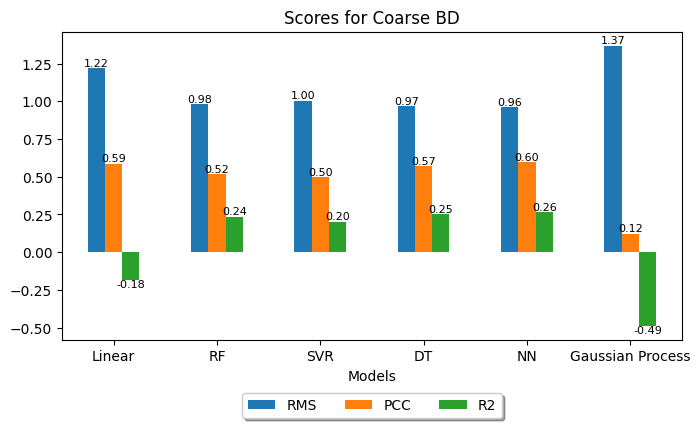

In [10]:
ehm_utils.scores_graph(EHMs_bd_coarse, plot_title = 'Scores for Coarse BD')

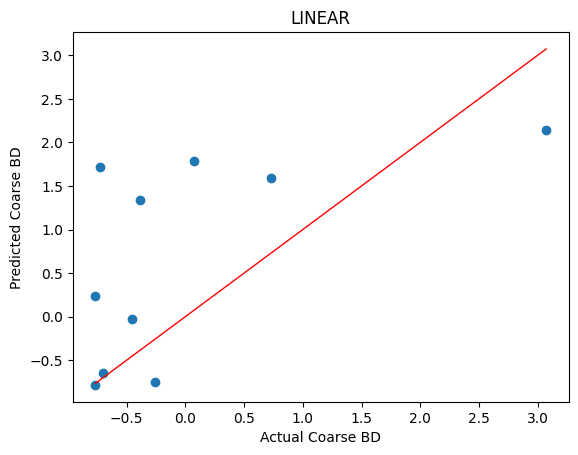

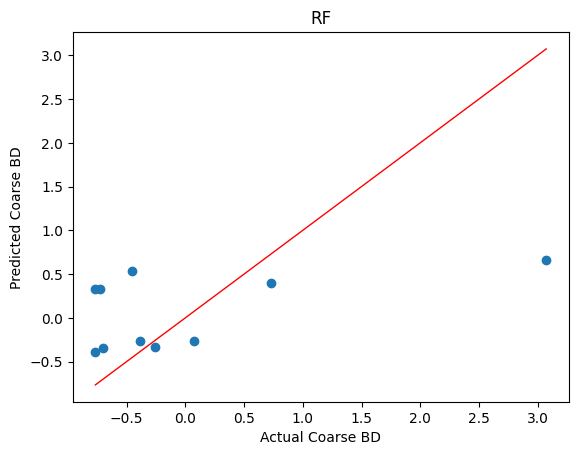

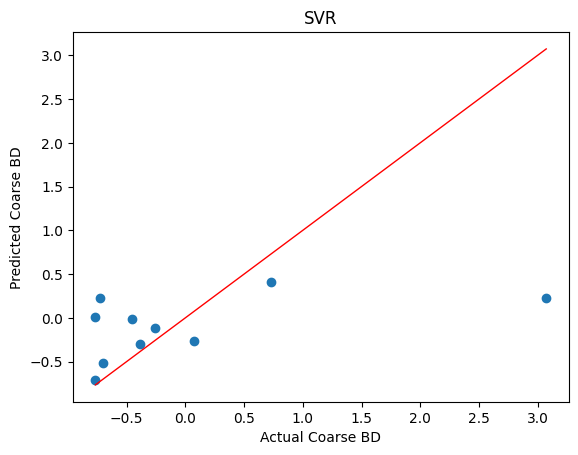

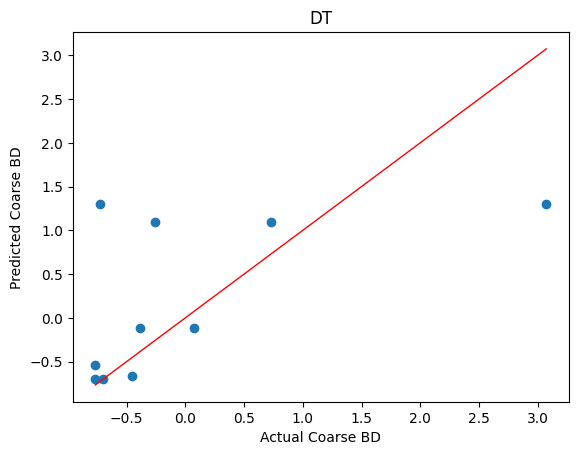

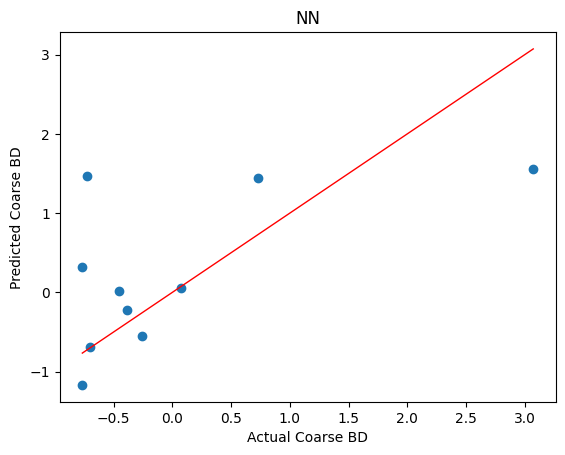

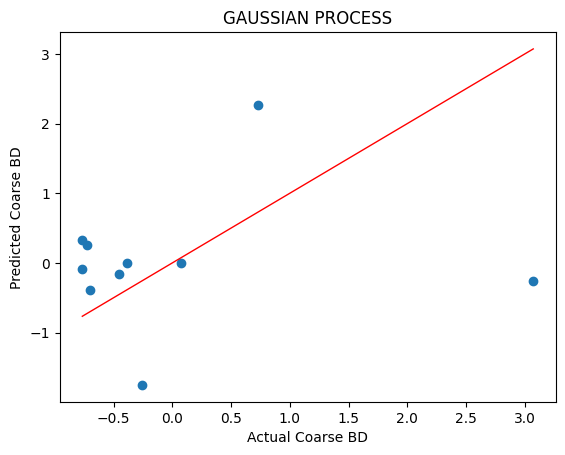

In [11]:
actual_axis_label = 'Actual Coarse BD'
predicted_axis_label = 'Predicted Coarse BD'


ehm_utils.plot_predicted_vs_actual(EHMs_bd_coarse, y_test, actual_axis_label, predicted_axis_label)

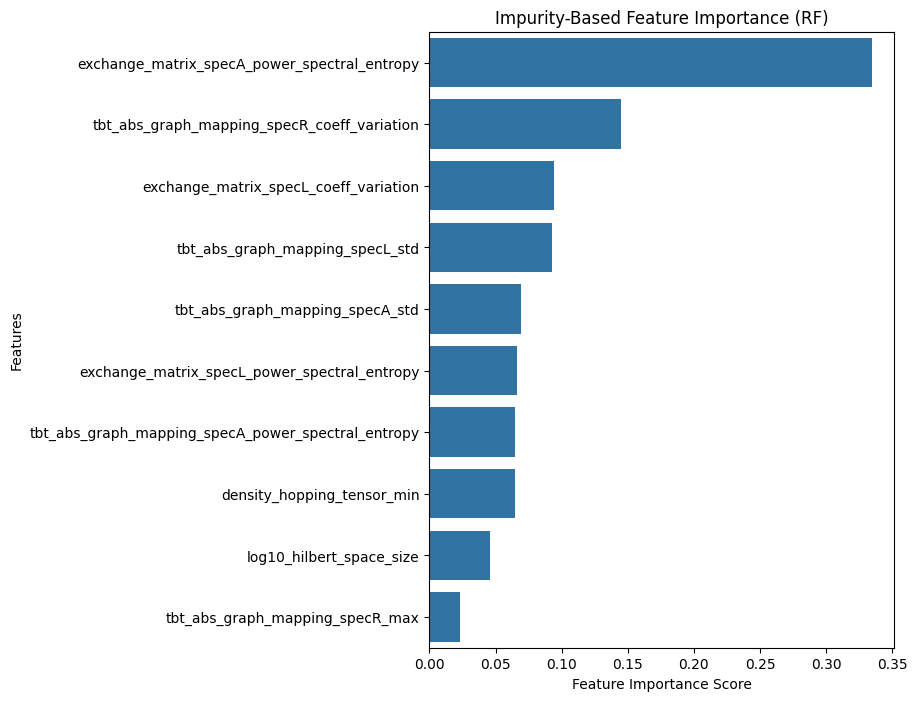

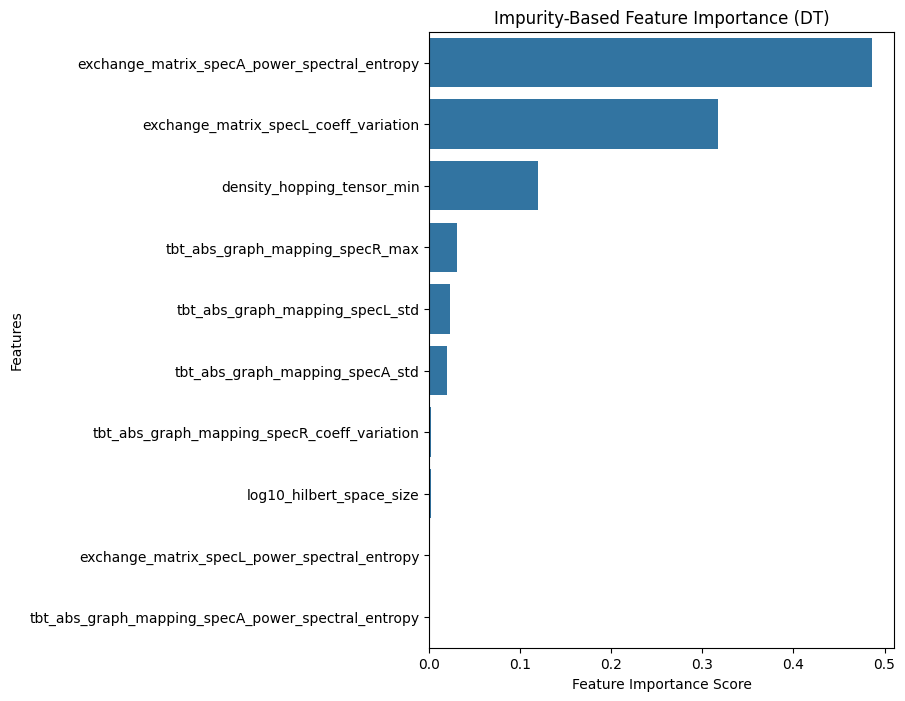

0.4454960823059082

In [12]:
start = time.time()

ehm_utils.feature_importance_impurity(EHMs_bd_coarse,features)

feature_importance_impurity_Conc_time = time.time() - start
feature_importance_impurity_Conc_time

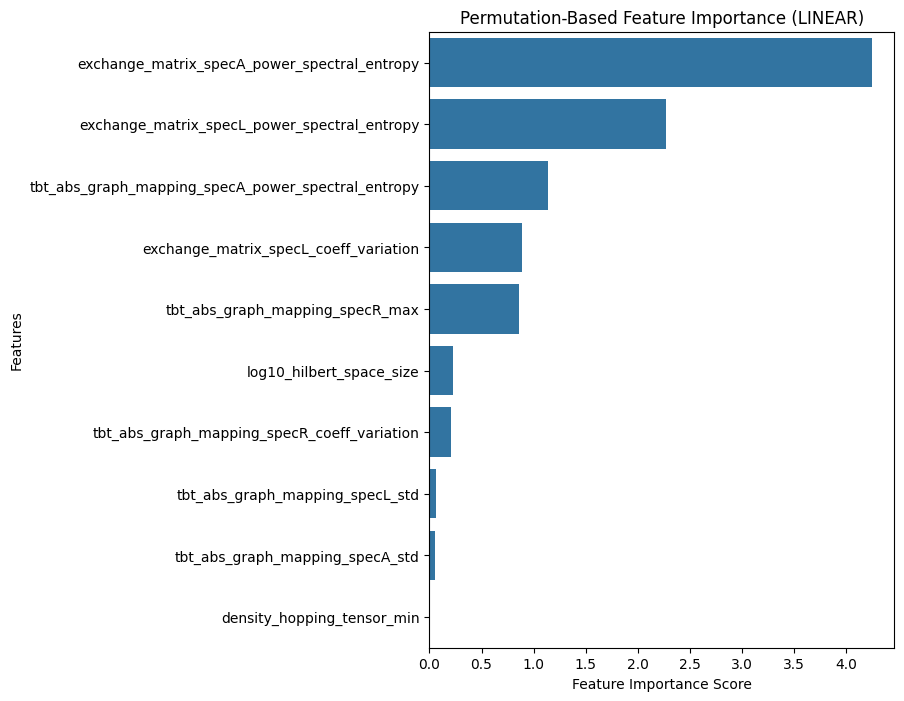

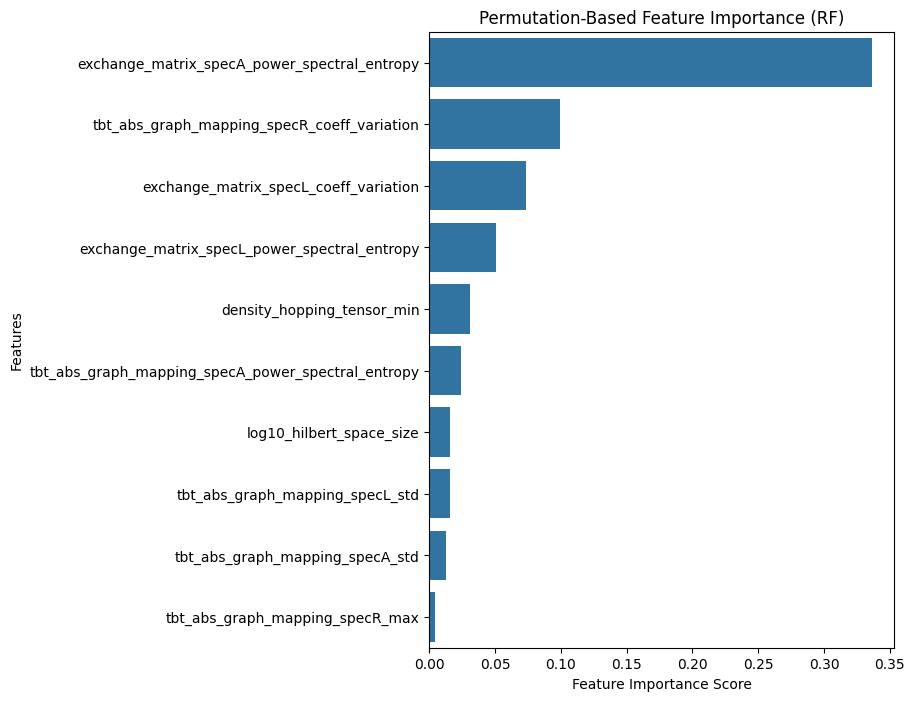

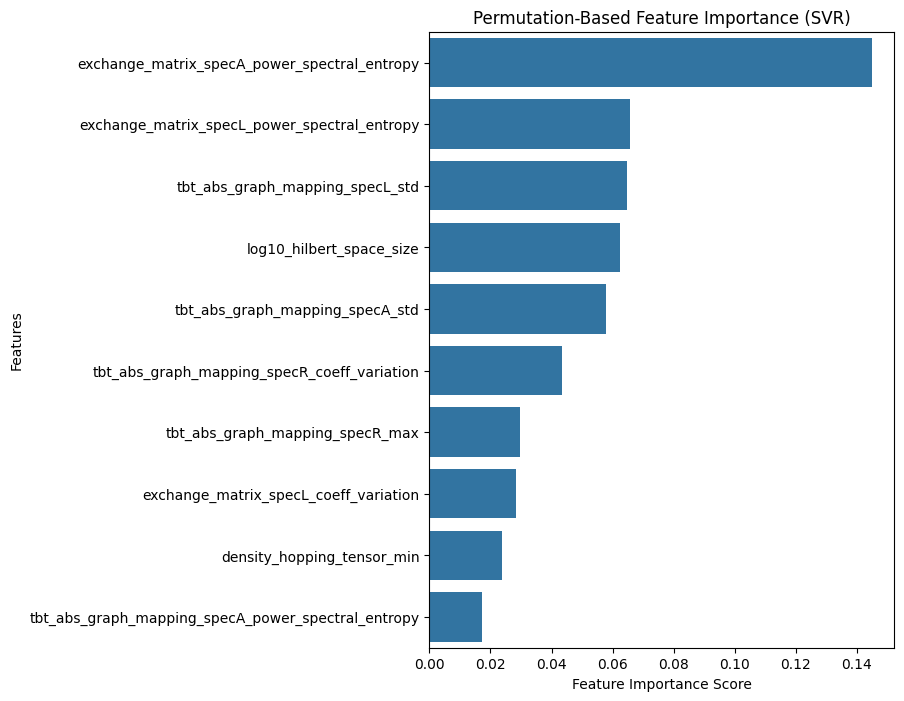

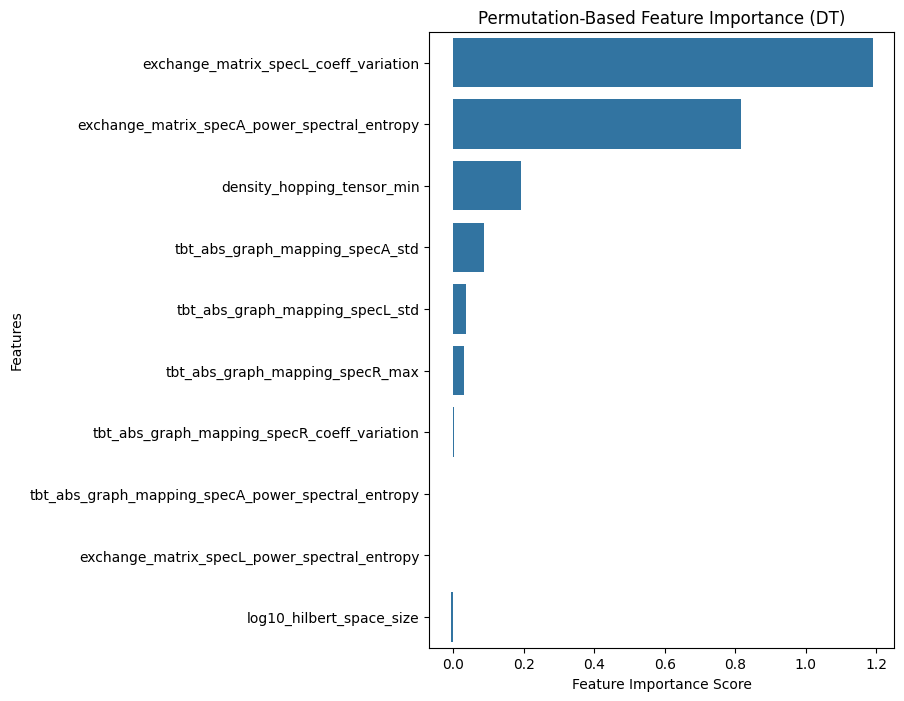

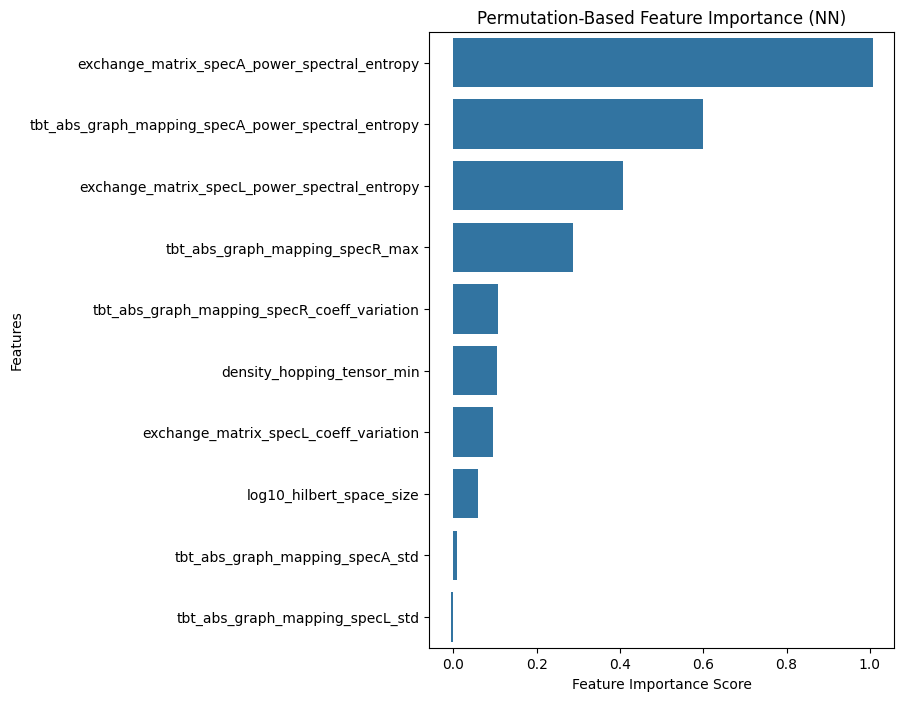

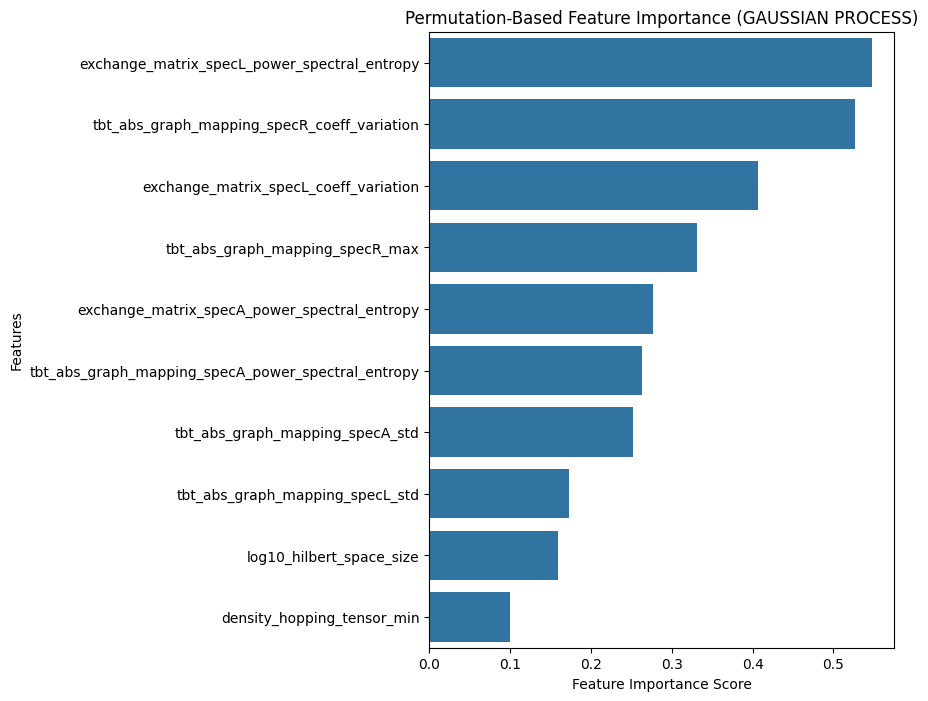

2.363344430923462

In [13]:
start = time.time()

ehm_utils.feature_importance_permutation(EHMs_bd_coarse,features, X, y)

feature_importance_permutation_Conc_time = time.time() - start
feature_importance_permutation_Conc_time

<Axes: xlabel='log10_hilbert_space_size', ylabel='tbt_abs_graph_mapping_algebraic_connectivity'>

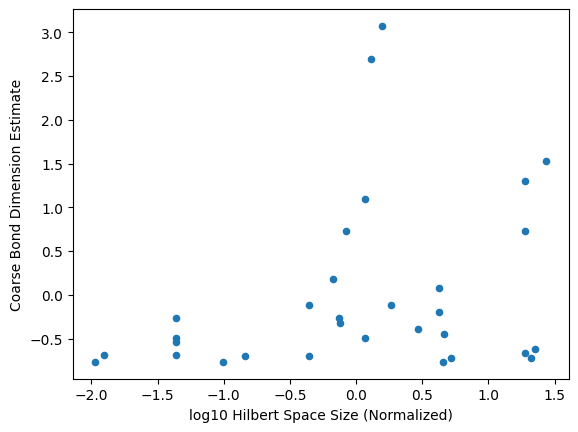

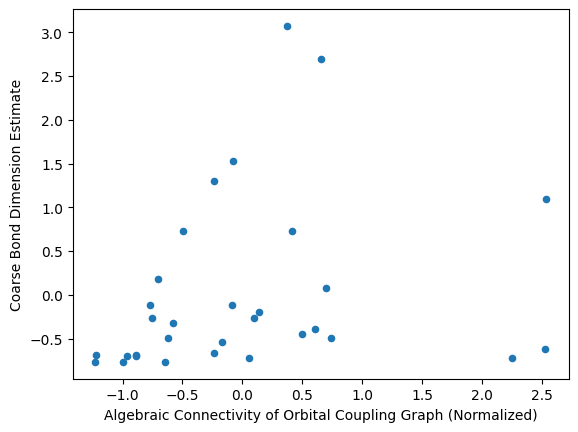

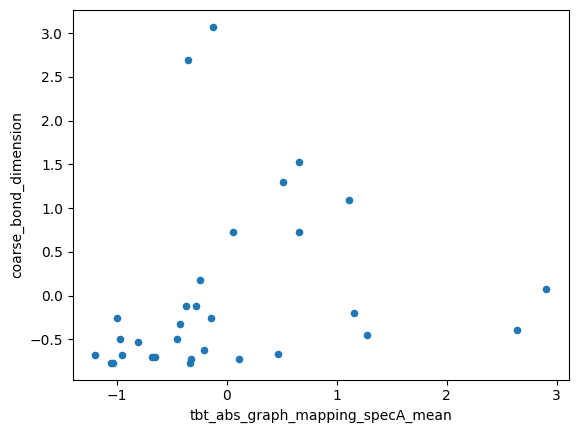

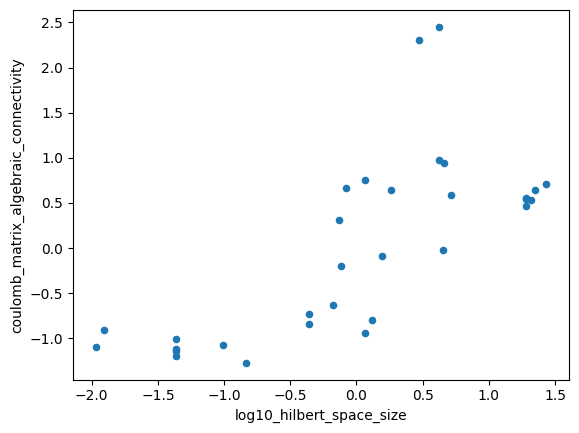

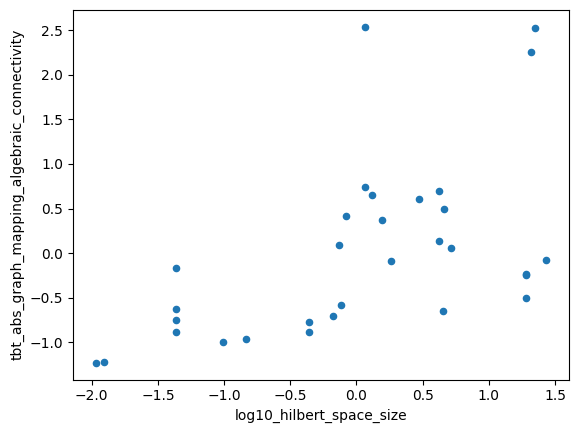

In [14]:
preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='coarse_bond_dimension', kind='scatter')
plt.xlabel('log10 Hilbert Space Size (Normalized)')
plt.ylabel('Coarse Bond Dimension Estimate')
preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_algebraic_connectivity', y='coarse_bond_dimension', kind='scatter')
plt.xlabel('Algebraic Connectivity of Orbital Coupling Graph (Normalized)')
plt.ylabel('Coarse Bond Dimension Estimate')
preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_specA_mean', y='coarse_bond_dimension', kind='scatter')
preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='coulomb_matrix_algebraic_connectivity', kind='scatter')
preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='tbt_abs_graph_mapping_algebraic_connectivity', kind='scatter')

# Pos
# log10_hilbert_space_size
# num_orbitals
# coulomb_matrix_bandwidth_upper
# coulomb_matrix_algebraic_connectivity
# coulomb_matrix_edgeCount
# coulomb_matrix_specA_max
# coulomb_matrix_specA_power_spectral_entropy
# coulomb_matrix_specR_power_spectral_entropy
# exchange_matrix_specA_power_spectral_entropy
# exchange_matrix_specR_min
# exchange_matrix_specR_power_spectral_entropy
# mean_field_calc_time_s
# mean_field_matrix_algebraic_connectivity
# mean_field_matrix_algebraic_connectivity_calc_time_s
# mean_field_matrix_specA_max
# mean_field_matrix_specA_power_spectral_entropy
# mean_field_matrix_specL_std
# mean_field_matrix_specR_power_spectral_entropy
# tbt_graph_mapping_calc_time_s
# tbt_abs_graph_mapping_calc_time_s
# tbt_abs_graph_mapping_algebraic_connectivity ***
# tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s
# tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s
# tbt_abs_graph_mapping_specA_min
# tbt_abs_graph_mapping_specA_Q2
# tbt_abs_graph_mapping_specA_max
# tbt_abs_graph_mapping_specA_mean **
# tbt_abs_graph_mapping_specA_std
# tbt_abs_graph_mapping_specA_coeff_variation
# tbt_abs_graph_mapping_specA_power_spectral_entropy
# tbt_abs_graph_mapping_specL_max
# tbt_abs_graph_mapping_specL_std
# tbt_abs_graph_mapping_specR_power_spectral_entropy
# density_hopping_tensor_min
# density_hopping_tensor_sum_abs

#Neg
# coulomb_matrix_specL_min
# coulomb_matrix_specL_Q2
# coulomb_matrix_specL_mean
# coulomb_matrix_specR_min
# exchange_matrix_specL_coeff_variation
# exchange_matrix_specL_power_spectral_entropy
# exchange_matrix_specR_max
# exchange_matrix_specR_std
# mean_field_matrix_specA_min
# mean_field_matrix_specL_min
# mean_field_matrix_specL_Q2
# mean_field_matrix_specL_mean
# mean_field_matrix_specR_min
# tbt_abs_graph_mapping_specL_coeff_variation
# tbt_abs_graph_mapping_specL_power_spectral_entropy
# tbt_abs_graph_mapping_specR_max
# tbt_abs_graph_mapping_specR_coeff_variation
# density_hopping_tensor_coeff_variation
# tbt_coeff_variation




In [15]:
# Calc the pearson correlation coefficient between pairs of features
corr_mat_df = mlData.corr()
corr_mat_df

,log10_hilbert_space_size,exchange_matrix_specA_power_spectral_entropy,exchange_matrix_specL_coeff_variation,exchange_matrix_specL_power_spectral_entropy,tbt_abs_graph_mapping_specA_std,tbt_abs_graph_mapping_specA_power_spectral_entropy,tbt_abs_graph_mapping_specL_std,tbt_abs_graph_mapping_specR_max,tbt_abs_graph_mapping_specR_coeff_variation,density_hopping_tensor_min,coarse_bond_dimension
log10_hilbert_space_size,1.000000,0.694308,-0.486526,-0.224713,0.721701,0.597174,0.731729,-0.126524,-0.672191,0.434674,0.287628
exchange_matrix_specA_power_spectral_entropy,0.694308,1.000000,-0.008533,0.177625,0.365086,0.382558,0.528187,0.364794,-0.370248,0.573970,0.395203
exchange_matrix_specL_coeff_variation,-0.486526,-0.008533,1.000000,0.922955,-0.643468,-0.683211,-0.433053,0.659863,0.608381,-0.390817,-0.335911
exchange_matrix_specL_power_spectral_entropy,-0.224713,0.177625,0.922955,1.000000,-0.414040,-0.555567,-0.225213,0.536783,0.343033,-0.341503,-0.263279
tbt_abs_graph_mapping_specA_std,0.721701,0.365086,-0.643468,-0.414040,1.000000,0.795059,0.884759,-0.591269,-0.818327,0.391974,0.352337
tbt_abs_graph_mapping_specA_power_spectral_entropy,0.597174,0.382558,-0.683211,-0.555567,0.795059,1.000000,0.763100,-0.405818,-0.708721,0.792807,0.295939
tbt_abs_graph_mapping_specL_std,0.731729,0.528187,-0.433053,-0.225213,0.884759,0.763100,1.000000,-0.294743,-0.645619,0.467128,0.323950
tbt_abs_graph_mapping_specR_max,-0.126524,0.364794,0.659863,0.536783,-0.591269,-0.405818,-0.294743,1.000000,0.626355,0.059880,-0.258219
tbt_abs_graph_mapping_specR_coeff_variation,-0.672191,-0.370248,0.608381,0.343033,-0.818327,-0.708721,-0.645619,0.626355,1.000000,-0.470097,-0.395208
density_hopping_tensor_min,0.434674,0.573970,-0.390817,-0.341503,0.391974,0.792807,0.467128,0.059880,-0.470097,1.000000,0.288345


In [16]:
corr_mat_df["log10_hilbert_space_size"].loc[np.abs(corr_mat_df["log10_hilbert_space_size"]) > 0.8]

log10_hilbert_space_size    1.0
Name: log10_hilbert_space_size, dtype: float64

In [17]:
corr_mat_df["coulomb_matrix_algebraic_connectivity"].loc[np.abs(corr_mat_df["coulomb_matrix_algebraic_connectivity"]) > 0.8]

KeyError: 'coulomb_matrix_algebraic_connectivity'

In [ ]:
corr_mat_df["tbt_abs_graph_mapping_algebraic_connectivity"].loc[np.abs(corr_mat_df["tbt_abs_graph_mapping_algebraic_connectivity"]) > 0.8]

In [ ]:
# corr_mat_df["coarse_bond_dimension"].sort_values(ascending=False)
corr_mat_df["coarse_bond_dimension"].loc[np.abs(corr_mat_df["coarse_bond_dimension"]) > 0.25].sort_values(ascending=False)